In [1]:
%load_ext autoreload

%reload_ext autoreload

# MODULE IMPORTS ----

# warning settings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

# HDDM
import hddm

In [2]:
# Metadata
nmcmc = 1000
model = 'ddm'
n_samples_by_condition = 1000
split_param = 'v'

In [3]:
sim_data_stimcoding, parameter_dict = hddm.simulators.simulator_stimcoding(model = model,
                                                                           split_by = split_param,
                                                                           drift_criterion = 0.3,
                                                                           n_trials_per_condition = 500)

In [4]:
help(hddm.simulators.simulator_stimcoding)

Help on function simulator_stimcoding in module hddm.simulators.hddm_dataset_generators:

simulator_stimcoding(model='angle', split_by='v', p_outlier=0.0, max_rt_outlier=10.0, drift_criterion=0.0, n_trials_per_condition=1000, delta_t=0.001, prespecified_params={}, bin_pointwise=False, bin_dim=None, max_t=20.0)
    Generate a dataset as expected by Hddmstimcoding. Essentially it is a specific way to parameterize two condition data.
    
    :Arguments:
        parameters: list or numpy array
            Model parameters with which to simulate.
        model: str <default='angle'>
            String that specifies the model to be simulated.
            Current options include, 'angle', 'ornstein', 'levy', 'weibull', 'full_ddm'
        split_by: str <default='v'>
            You can split by 'v' or 'z'. If splitting by 'v' one condition's v_0 = drift_criterion + 'v', the other
            condition's v_1 = drift_criterion - 'v'.
            Respectively for 'z', 'z_0' = 'z' and 'z_1' = 1 

In [4]:
sim_data_stimcoding = sim_data_stimcoding.reset_index(drop = True)

In [5]:
sim_data_stimcoding.loc[sim_data_stimcoding.response == 0, 'rt'] = -999

In [6]:
sim_data_stimcoding

,rt,response,stim,v,a,z,t,subj_idx
0,1.959340,1,1,1.159363,2.048363,0.420801,0.893346,none
1,4.452271,1,1,1.159363,2.048363,0.420801,0.893346,none
2,2.490365,1,1,1.159363,2.048363,0.420801,0.893346,none
3,2.813380,1,1,1.159363,2.048363,0.420801,0.893346,none
4,3.311353,1,1,1.159363,2.048363,0.420801,0.893346,none
...,...,...,...,...,...,...,...,...
995,3.271356,0,2,-0.559363,2.048363,0.420801,0.893346,none
996,3.121367,0,2,-0.559363,2.048363,0.420801,0.893346,none
997,5.907166,0,2,-0.559363,2.048363,0.420801,0.893346,none
998,2.983377,0,2,-0.559363,2.048363,0.420801,0.893346,none


In [6]:
hddmnn_model = hddm.HDDMnnStimCoding(sim_data_stimcoding,
                                     include = hddm.simulators.model_config[model]['hddm_include'],
                                     model = model,
                                     stim_col = 'stim',
                                     p_outlier = 0.0,
                                     split_param = split_param,
                                     informative = False,
                                     drift_criterion = True)

NotImplementedError: The HDDMnn classes can not yet deal with missing values. Support coming soon!

In [7]:
hddmnn_basic_model = hddm.HDDMnn(sim_data_stimcoding,
                             include = hddm.simulators.model_config[model]['hddm_include'],
                             model = model,
                             p_outlier = 0.0,
                             informative = False)

NotImplementedError: The HDDMnn classes can not yet deal with missing values. Support coming soon!

In [14]:
hddmnn_basic_model.sample(nmcmc, burn = 100)

 [---               8%                  ] 84 of 1000 complete in 22.9 secHalting at iteration  83  of  1000
Could not generate output statistics for t
Could not generate output statistics for v
Could not generate output statistics for a
Could not generate output statistics for z
Could not generate output statistics for z_trans


TypeError: 'NoneType' object is not subscriptable

In [ ]:
hddmnn_model.sample(nmcmc, burn = 100)

In [8]:
hddm_model = hddm.HDDMStimCoding(sim_data_stimcoding,
                                 include = hddm.simulators.model_config[model]['hddm_include'],
                                 stim_col = 'stim',
                                 p_outlier = 0.0,
                                 split_param = split_param,
                                 informative = False,
                                 drift_criterion = True)

No model attribute --> setting up standard HDDM
Set model to ddm


In [27]:
hddm_model.sample(nmcmc, burn = 100)

 [-----------------100%-----------------] 1000 of 1000 complete in 35.6 sec

In [37]:
hddmnn_model.gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v,1.50369,0.0503402,1.40661,1.47241,1.49884,1.53692,1.60674,0.00312923
a,1.21609,0.0824999,1.1148,1.16168,1.2006,1.24152,1.47461,0.0078563
z,0.502645,0.0136967,0.474927,0.494108,0.503027,0.511223,0.529623,0.000705154
g,0.676203,0.244276,-0.0489132,0.567398,0.709073,0.860504,0.983883,0.0226653
t,1.19513,0.0217735,1.13374,1.18444,1.1991,1.21031,1.2274,0.00194117
dc,0.265591,0.0451601,0.179805,0.235347,0.264587,0.293601,0.364196,0.00213302


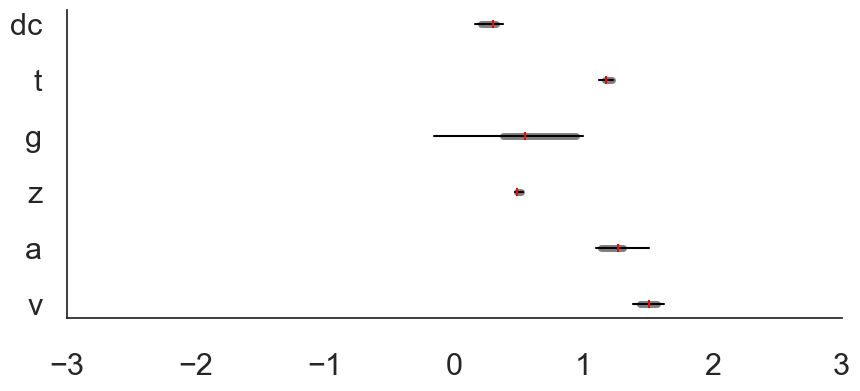

In [38]:
hddm.plotting.caterpillar_plot(hddm_model = hddmnn_model,
                             ground_truth_parameter_dict = parameter_dict,
                             drop_sd = False,
                             x_limits = [-3, 3])

### HIERARCHICAL VERSION

In [52]:
data = []
for subj in range(10):
    sim_data_stimcoding, parameter_dict = hddm.simulators.simulator_stimcoding(model = model,
                                                                               split_by = split_param,
                                                                               drift_criterion = 0.3,
                                                                               n_samples_by_condition = 500)
    sim_data_stimcoding['subj_idx'] = subj
    
    data.append(sim_data_stimcoding)
    
data = pd.concat(data)

In [59]:
hddmnn_model = hddm.HDDMnnStimCoding(data,
                                     include = hddm.simulators.model_config[model]['hddm_include'],
                                     model = model,
                                     stim_col = 'stim',
                                     p_outlier = 0.0,
                                     split_param = split_param,
                                     informative = False,
                                     is_group_model = True,
                                     depends_on = {},
                                     drift_criterion = True)

Setting priors uninformative (LANs only work with uninformative priors for now)
Includes supplied:  ['z', 'g']


In [60]:
hddmnn_model.sample(300, burn = 100)

 [-----------------100%-----------------] 301 of 300 complete in 239.7 sec

In [61]:
hddmnn_model.gen_stats()[60:80]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
dc,0.52069,0.209678,0.0601079,0.388063,0.524154,0.655378,0.948862,0.0133431
dc_std,0.638875,0.17958,0.389035,0.506166,0.618176,0.744461,1.09783,0.0142266
dc_subj.0,0.733523,0.0888233,0.572142,0.671505,0.733374,0.802415,0.902622,0.00726884
dc_subj.1,0.402484,0.0556811,0.292607,0.360026,0.40564,0.438318,0.516064,0.00435108
dc_subj.2,0.302857,0.0255819,0.247516,0.288638,0.305017,0.321058,0.344241,0.00208399
dc_subj.3,0.432747,0.0378038,0.359525,0.407738,0.432439,0.458717,0.501891,0.00321865
dc_subj.4,0.263934,0.036472,0.194515,0.237844,0.266959,0.288271,0.327261,0.00316814
dc_subj.5,0.17038,0.0445009,0.0898569,0.135946,0.172472,0.200152,0.260064,0.00405629
dc_subj.6,0.191657,0.0609981,0.066515,0.160862,0.195456,0.234292,0.305317,0.00514904
dc_subj.7,0.329185,0.0628998,0.182006,0.294107,0.332354,0.375742,0.455582,0.00588269


In [48]:
data['v'].mean()

0.3